In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cm
%matplotlib inline

In [2]:
import sys; sys.path.append("../offline/")
import sparse, geom, utils

In [3]:
run = 592

## Load goodpixel mask

In [4]:
with h5py.File("./goodpixels.h5", 'r') as f:
    goodpixels = f['data/data'][:]

## Load cell ids and litpixel scores

In [5]:
with sparse.Run("../data/r%04d.h5" %run) as r:
    cells = r.cellIds
    score = r.litpixel
goodcells = np.ones(len(cells), dtype=np.bool)
goodcells[cells == 0] = False
#goodcells[cells >= 142] = False

## Lit-pixel histogram

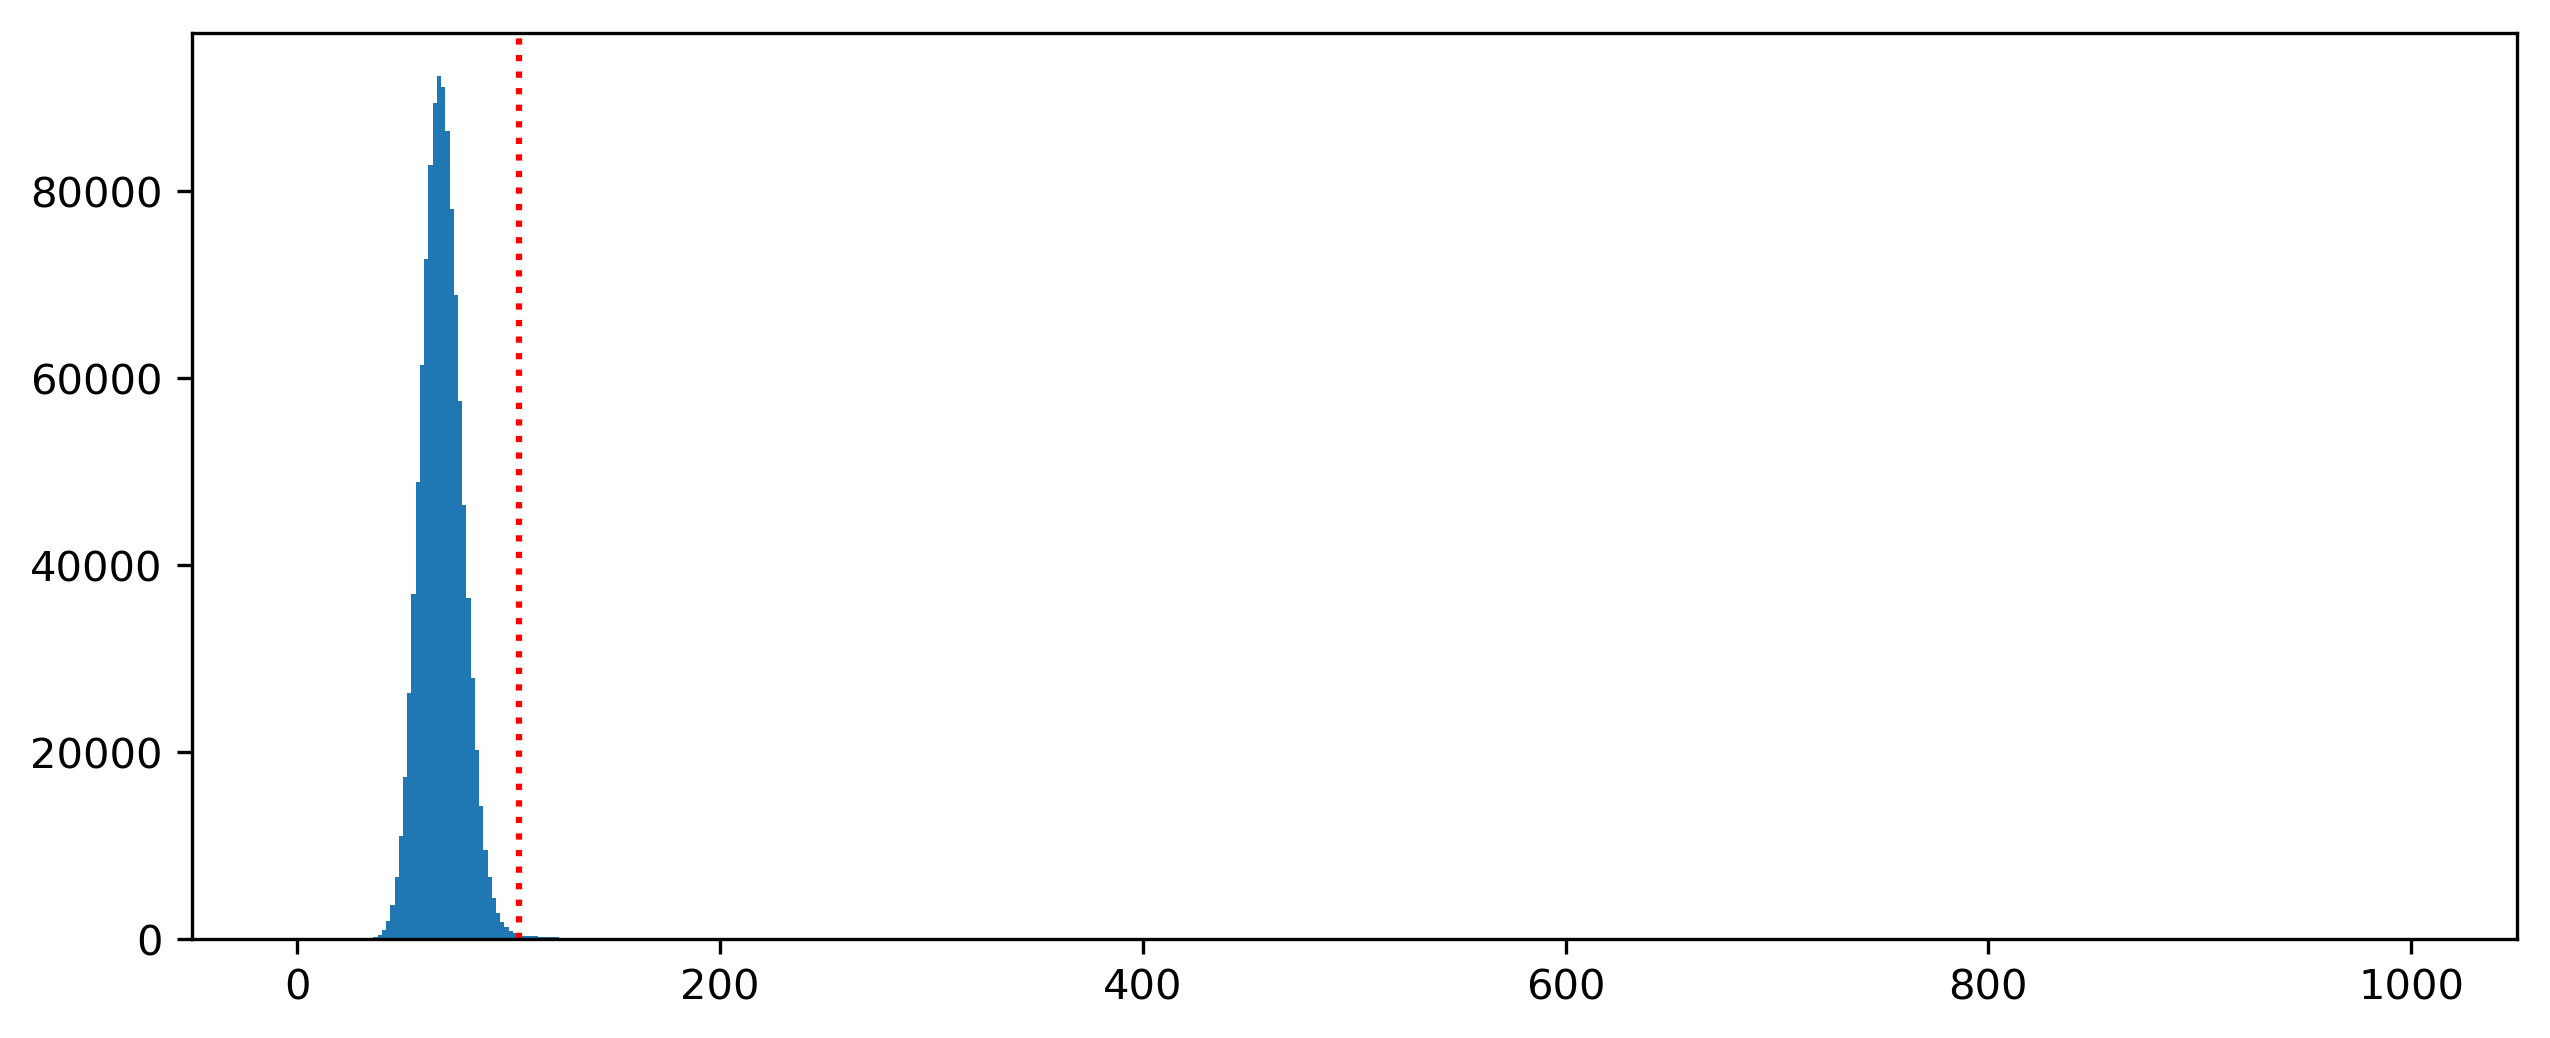

In [6]:
plt.figure(figsize=(10,4), dpi=300)
plt.hist(score[goodcells], range=(0,1000), bins=500)
plt.axvline(105, ls=':', color='r')
plt.savefig("../plots/r%04d_litpixel_histogram.png" %run, bbox_inches='tight')
plt.show()

## Hit-rate

In [7]:
nhits = (score[goodcells]>105).sum()
nevents = goodcells.sum() 
print("Number of hits for run %d: %d" %(run,nhits))
print("The hitrate for run %d is %.4f%%" %(run,  nhits / nevents * 100.))

Number of hits for run 592: 4479
The hitrate for run 592 is 0.4023%


## Glorious shots (the 50 strongest hits)

In [8]:
strong = np.argsort(score)[::-1][:50]

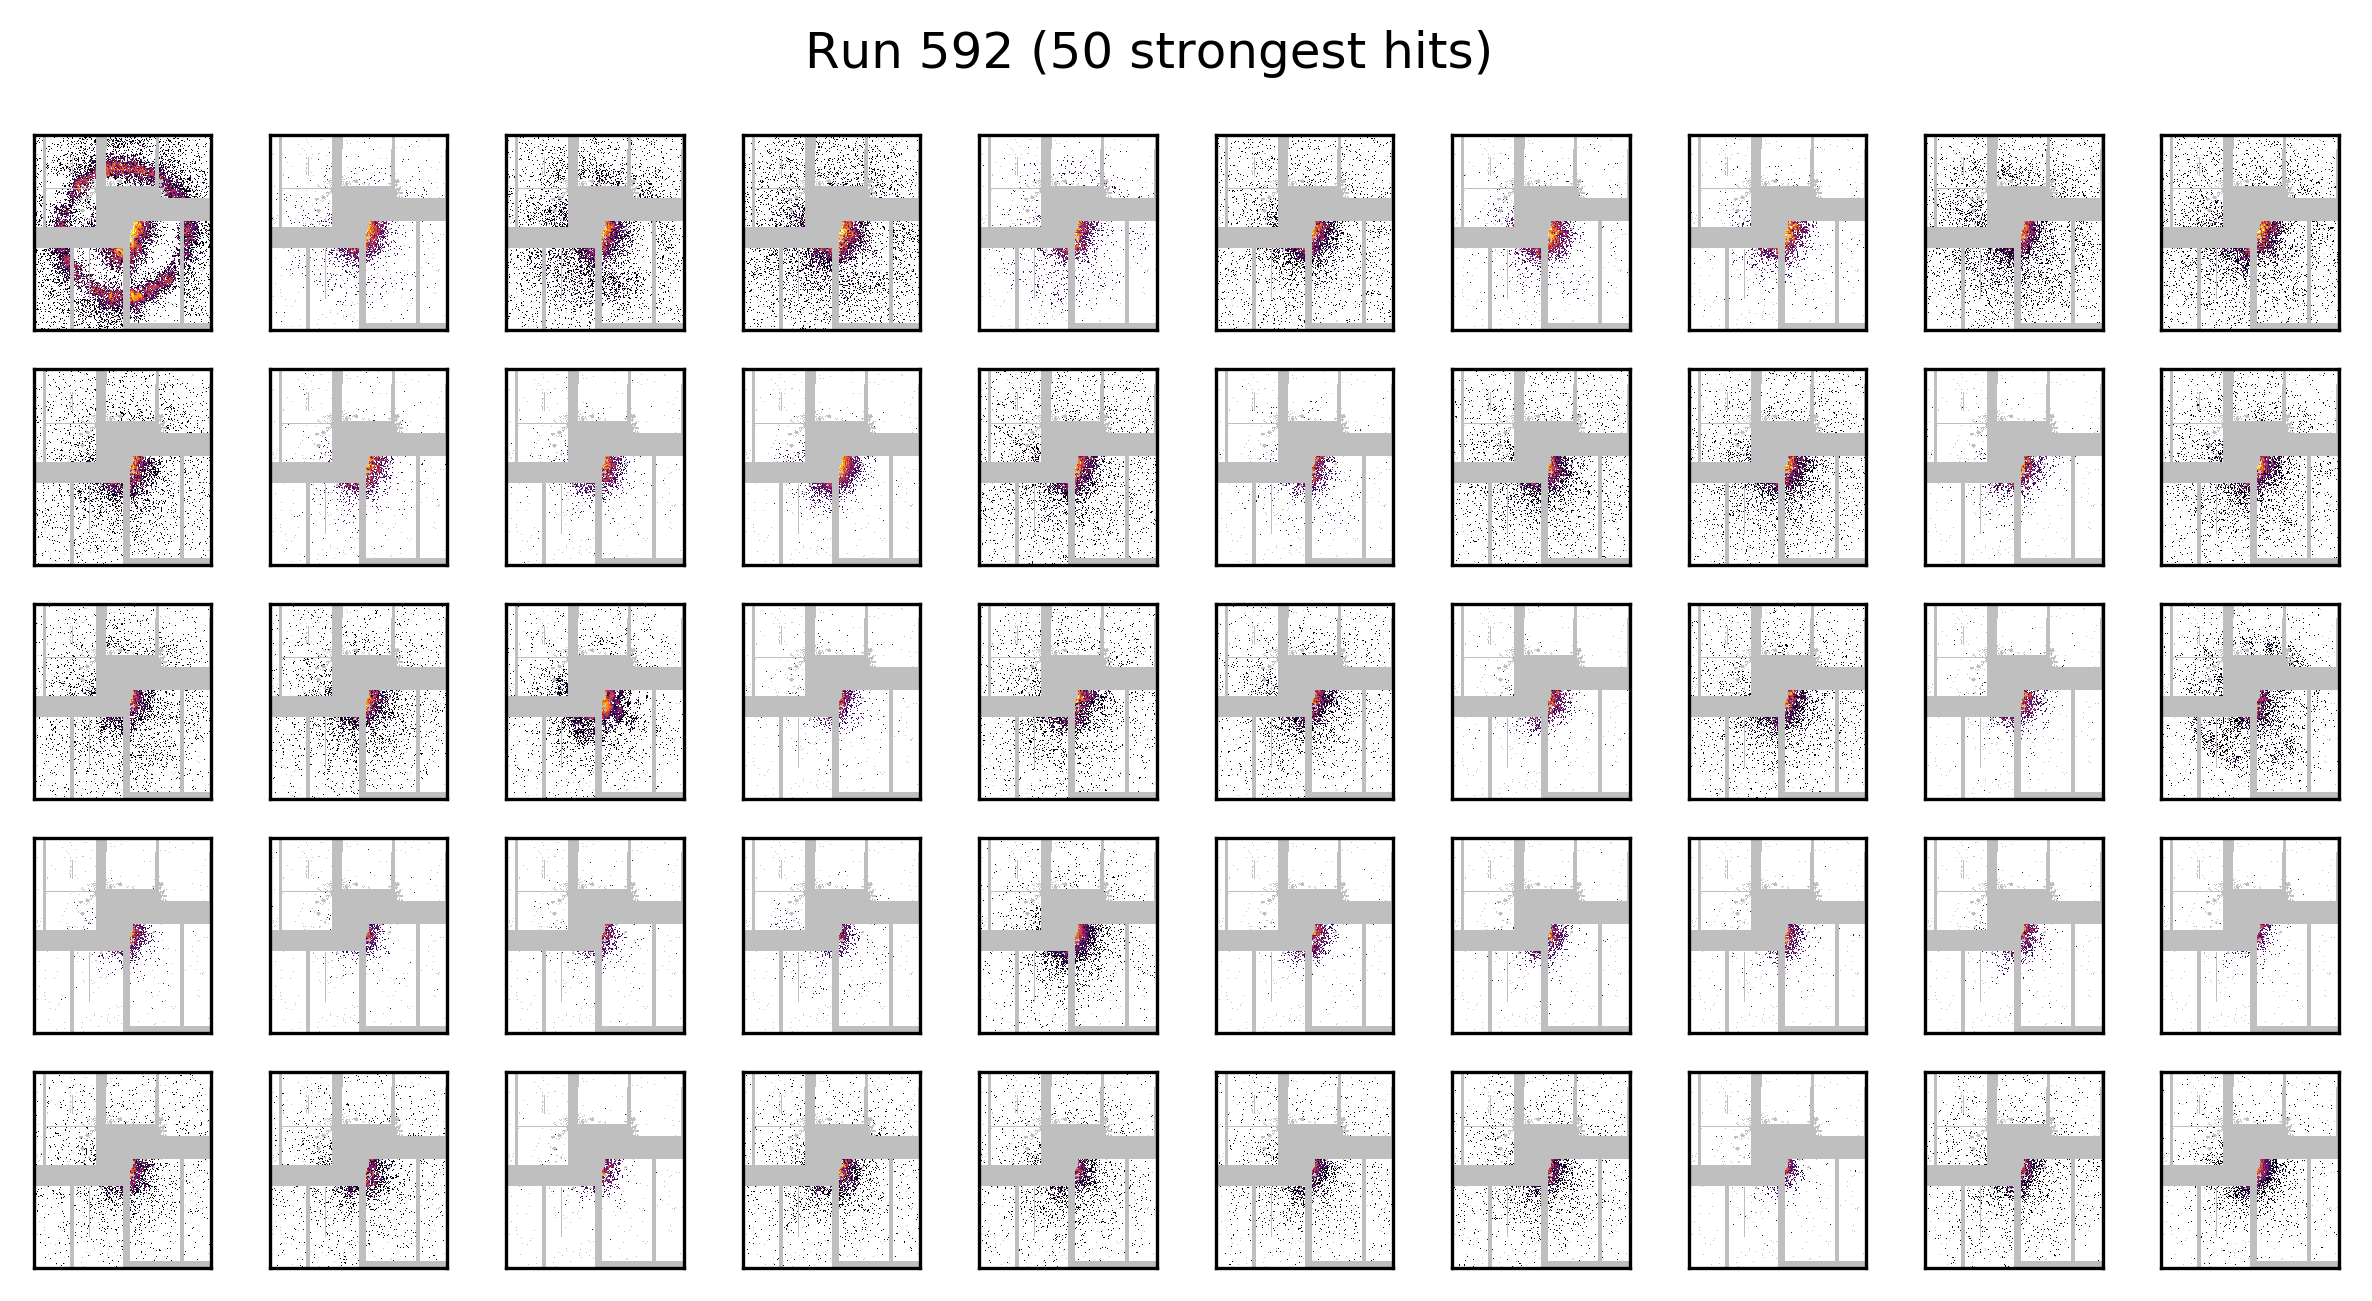

In [9]:
cx = 450
cy = 520
fig, axes = plt.subplots(nrows=5, ncols=10, figsize=(10,5), dpi=300)
fig.suptitle("Run %d (50 strongest hits)" %(run), y=0.95)
cmap = cm.get_cmap('inferno')
cmap.set_bad('0.75')
cmap.set_under('1.0')
for j in range(50):
    c,r = j//10, j%10
    axes[c,r].set_xticks([])
    axes[c,r].set_yticks([])
    with sparse.Frame("../data/r%04d.h5" %run, geometry="../geometry/b1.geom", goodmask=goodpixels) as f:
        img = np.float64(f.assembled(strong[j]))
        msk = (f.activepixels & f.goodpixels)
    mimg = np.ma.masked_array(img, mask=1-msk)
    mimg.data[mimg.data==0] = 1e-10
    axes[c,r].imshow(mimg[cy:-cy, cx:-cx], norm=colors.LogNorm(vmin=1, vmax=100), cmap=cmap)
plt.savefig("../plots/r%04d_best_shots.png" %run, bbox_inches='tight')
plt.show()

## Not so glorious shots (the 50 weakest hits)

In [10]:
weak = np.argsort(score)[::-1][:nhits][-50:]

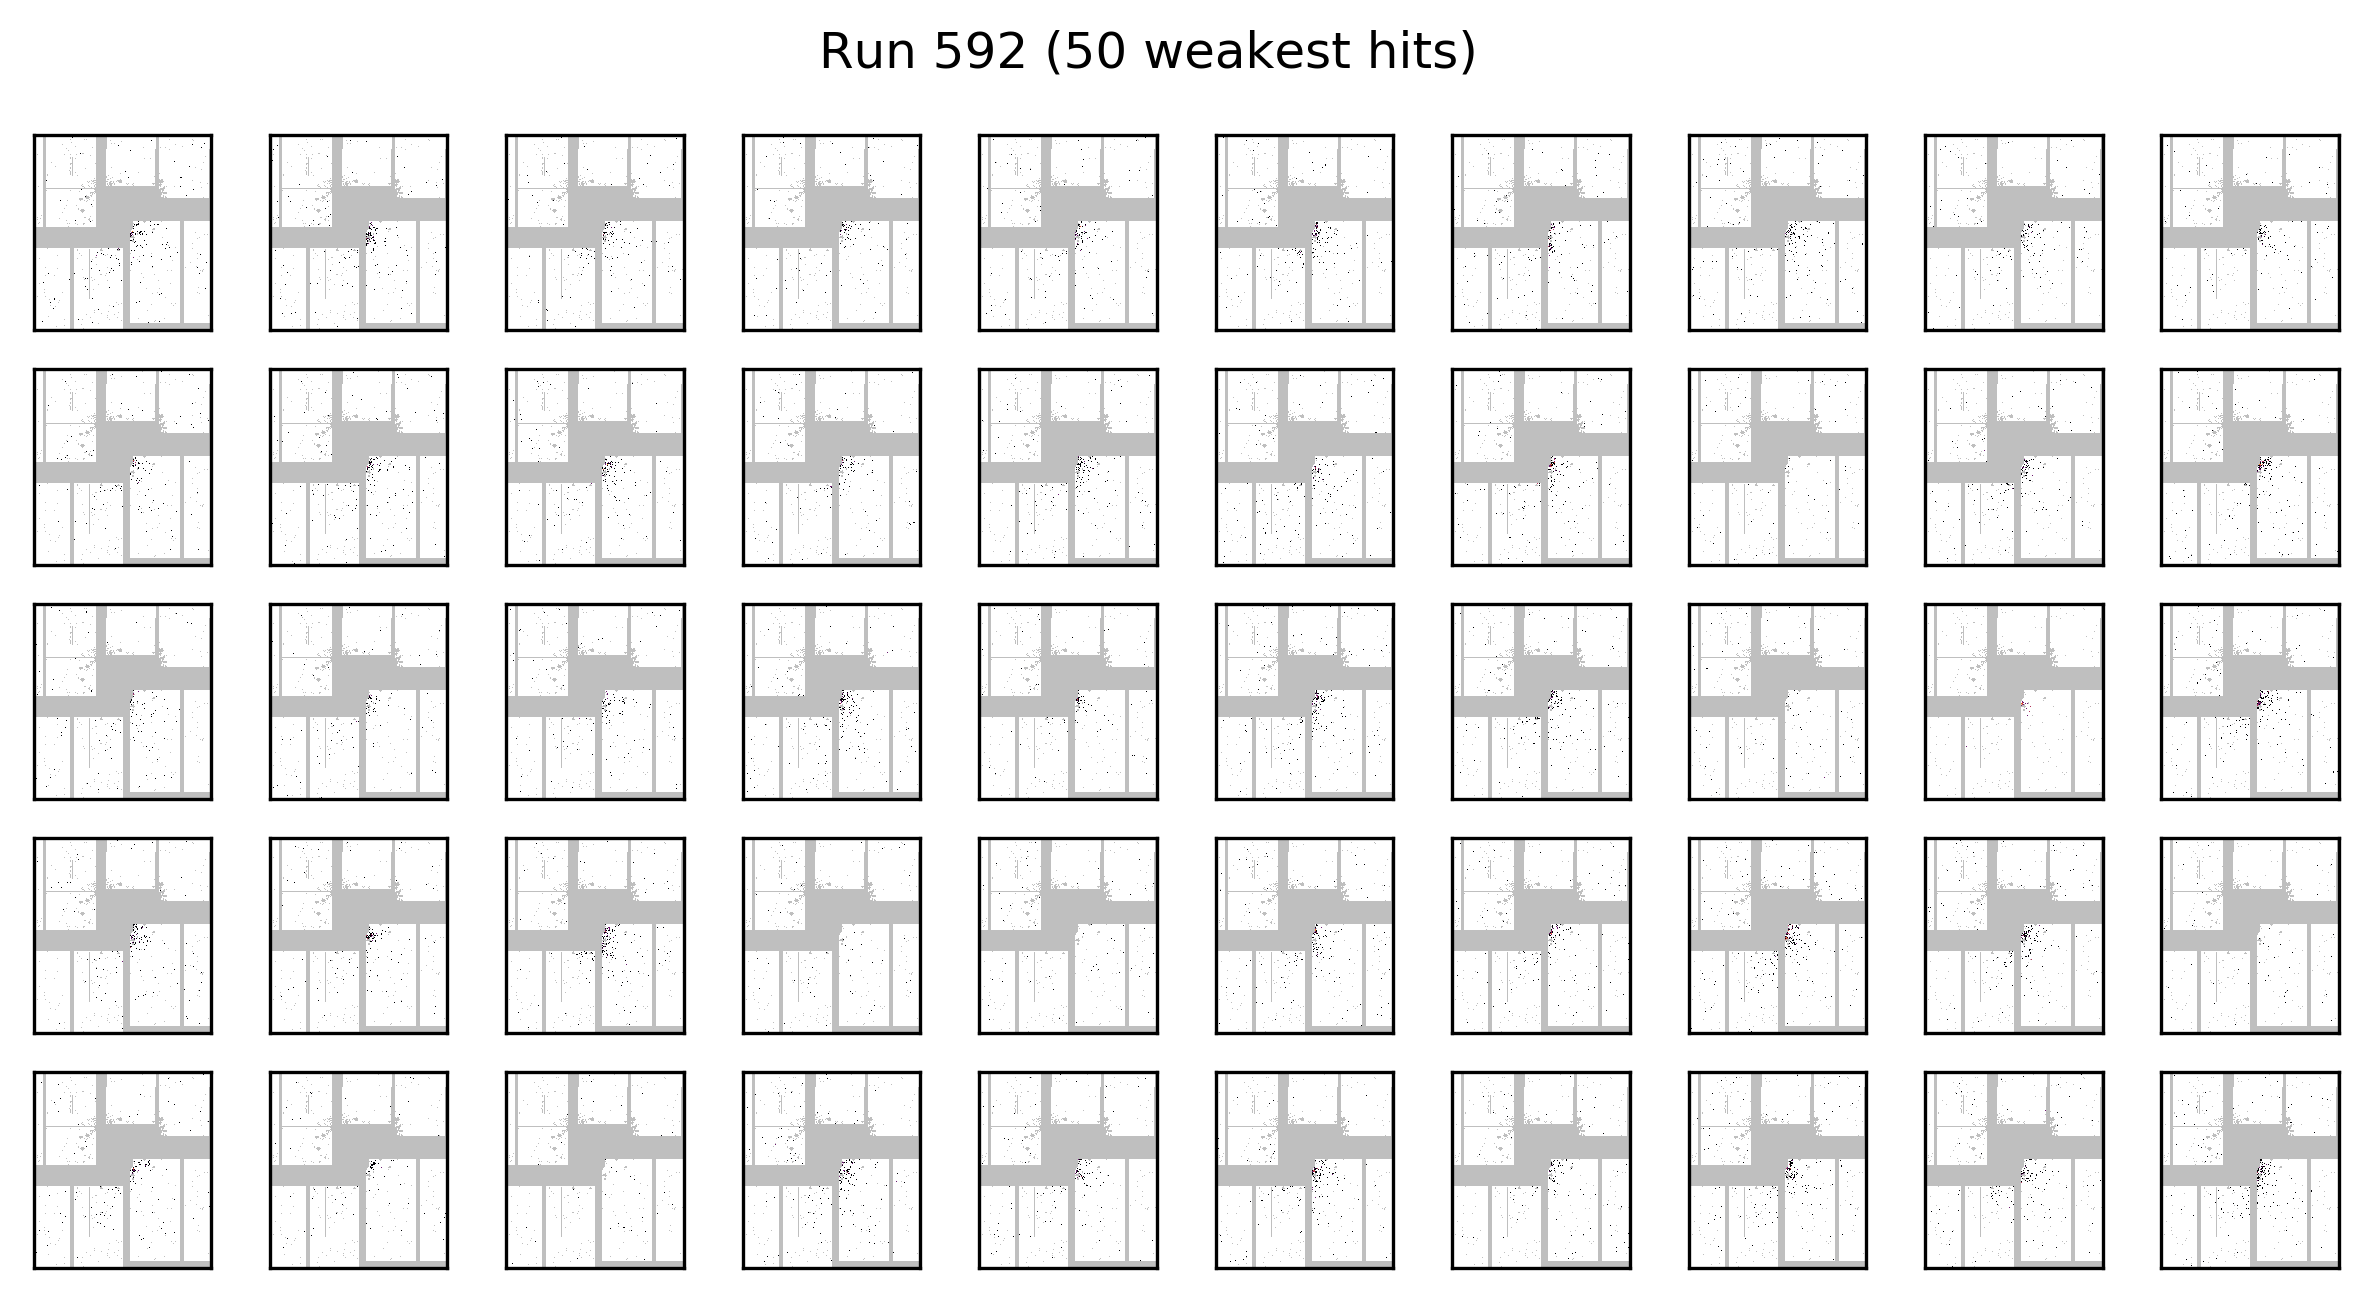

In [11]:
cx = 450
cy = 520
fig, axes = plt.subplots(nrows=5, ncols=10, figsize=(10,5), dpi=300)
fig.suptitle("Run %d (50 weakest hits)" %(run), y=0.95)
cmap = cm.get_cmap('inferno')
cmap.set_bad('0.75')
cmap.set_under('1.0')
for j in range(50):
    c,r = j//10, j%10
    axes[c,r].set_xticks([])
    axes[c,r].set_yticks([])
    with sparse.Frame("../data/r%04d.h5" %run, geometry="../geometry/b1.geom", goodmask=goodpixels) as f:
        img = np.float64(f.assembled(weak[j]))
        msk = (f.activepixels & f.goodpixels)
    mimg = np.ma.masked_array(img, mask=1-msk)
    mimg.data[mimg.data==0] = 1e-20
    axes[c,r].imshow(mimg[cy:-cy, cx:-cx], norm=colors.LogNorm(vmin=1, vmax=10), cmap=cmap)
plt.savefig("../plots/r%04d_weakest_shots.png" %run, bbox_inches='tight')
plt.show()

## Count lit pixels
using inner 128x128 pixels of modules 3,4,8,15

In [12]:
debug = False
if debug:
    with sparse.Litpixel("../data/r%04d.h5" %run, goodmask=goodpixels) as lp:
        msk = lp.goodmask & lp.hitmask
        score = lp.count()

In [13]:
plot_litpixel_mask = False
if plot_litpixel_mask:
    plt.figure(figsize=(10,10), dpi=100)
    plt.axis('off')
    plt.imshow(utils.assemble(msk, "../geometry/b1.geom"), cmap='gray')
    plt.savefig("../plots/hitfinding_mask.png", bbox_inches='tight')
    plt.show()

## Lit-pixels vs. cells

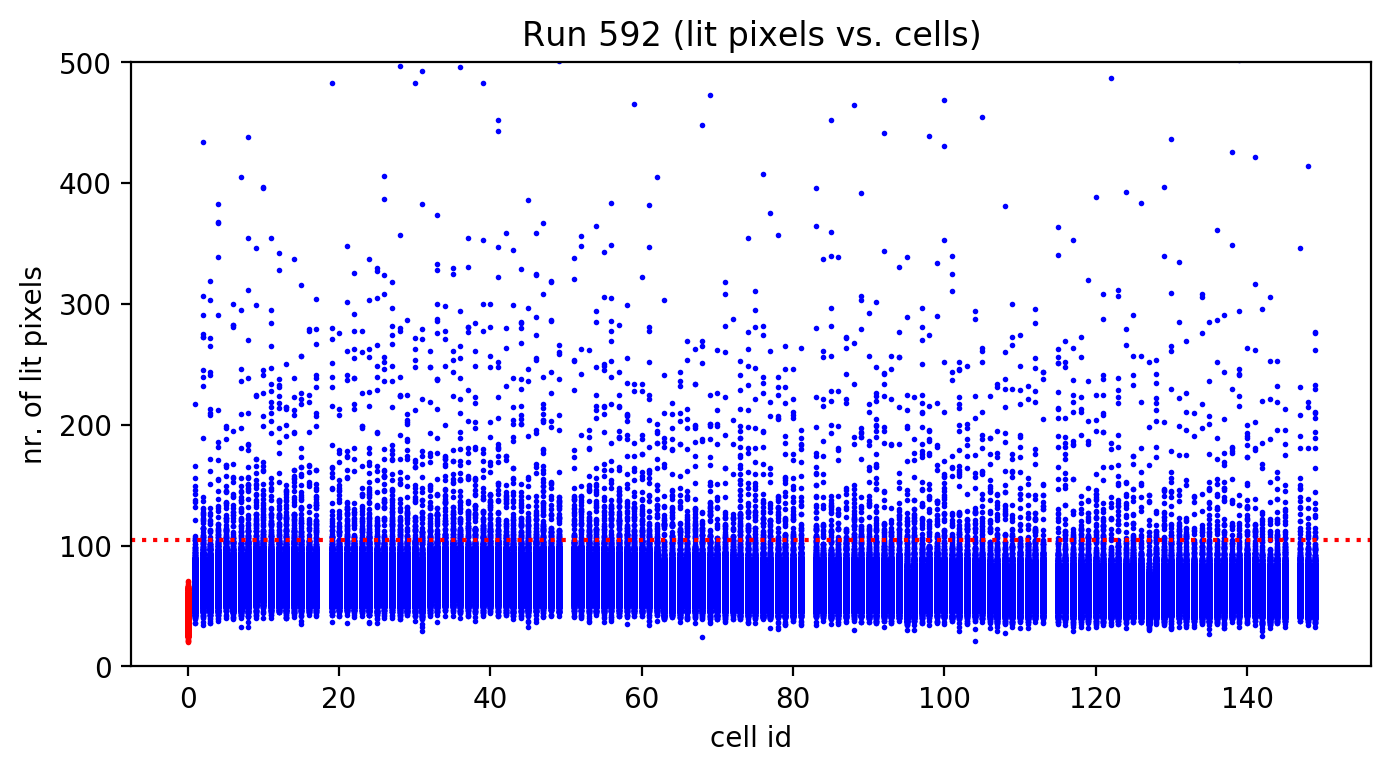

In [14]:
plt.figure(figsize=(8,4), dpi=200)
plt.title("Run %d (lit pixels vs. cells)" %run)
plt.plot(cells[goodcells], score[goodcells], 'bo', ms=1)
plt.plot(cells[~goodcells], score[~goodcells], 'ro', ms=1)
plt.axhline(105, ls=':', color='r')
plt.xlabel("cell id")
plt.ylabel("nr. of lit pixels")
plt.ylim(0,500)
plt.savefig("../plots/r%04d_litpixel_vs_cells.png" %run)
plt.show()